In [5]:
# pandas
import pandas as pd
import numpy as np

# crawling
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import time

# word tokenize
from konlpy.tag import Okt
from collections import Counter

# visualize and wordcloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [6]:
# font
font_path = "C:/Windows/fonts/Hancom Gothic Bold.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()

plt.rc('font', family=font_name)

In [7]:
# pandas setting
pd.set_option("display.max_rows", 500)

In [8]:
wd = webdriver.Chrome()

In [9]:
# 네이버 영화
url = "https://movie.naver.com/movie/point/af/list.naver?&page="

title = []
rank = []
report = []


N = 2

for i in range(1,N+1):
    wd.get(url + "%d" % (N+1-i)) # 댓글이 업데이트 될 수도 있기에 중복을 막고자 역순으로 진행
    html = wd.page_source
    soup = bs(html, 'html.parser')
    
    # 영화 제목
    tags = soup.select('tbody a.movie')
    for tag in tags:
        title.append(tag.get_text())
        
    # 영화 평점
    tags = soup.select('tbody div.list_netizen_score em')
    for tag in tags:
        rank.append(tag.get_text())
    
    # 영화 리뷰
    tags = soup.select('tbody a.report')
    for tag in tags:
        report.append(tag['onclick'].split("', '")[2])
        
    time.sleep(1)

In [10]:
movie = pd.DataFrame({'title':title, 'rank':rank, 'report':report})

In [12]:
movie['rank'] = movie['rank'].astype(int)

In [13]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20 non-null     object
 1   rank    20 non-null     int32 
 2   report  20 non-null     object
dtypes: int32(1), object(2)
memory usage: 528.0+ bytes


In [14]:
movie

,title,rank,report
0,아바타: 물의 길,10,감명깊게 잘 봤습니다 ~~ 예전과 같은 감동 !!
1,영웅,9,다들 연기와 노래를 잘 소화해서 감정이입하고 봤어요.
2,데시벨,10,가슴이 먹먹해지는 영화입니다
3,아바타: 물의 길,10,"1편 보다 감동과 신기함은 없었지만, 3,4,5편을 위한 포석과 빌딩용으로 생각한다..."
4,영웅,1,큰 기대감없이 봤습니다만 역시 기대 이하네요. 최소한 역사물이라면 그만한 고증은 해...
5,영웅,10,최고의 영화입니다.조마리아 여사님의 편지 낭독부터 엉엉 울었네요.
6,영웅,10,나라를 위해 희생한 사람이 얼마나 많을까?ㅜㅜ
7,영웅,10,진짜 솔직히 말 하면 뮤지컬 영화지만 뮤지컬 요소가 없었으면 했음 노래가 툭 하면 ...
8,아바타: 물의 길,10,13년을 기다린 이유!!!하지만 더이상 기다릴 순 없다~~얼른 3편 개봉해줘요 카메...
9,본즈 앤 올,2,김혜자의 쓰레기같은 생각을 했구나 라는 짤이 떠오름.마지막에 뭘 느껴야하는지도 모르...


In [ ]:
# movie.to_csv('movie.csv', index = False)

In [16]:
movie = pd.read_csv('movie.csv')

In [17]:
movie = movie.fillna('')

In [18]:
movie_counts = movie['title'].value_counts().reset_index()
movie_counts.head(8)

,index,title
0,아바타: 물의 길,4101
1,영웅,2084
2,올빼미,448
3,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",389
4,탄생,108
5,데시벨,84
6,헌트,58
7,동감,56


In [19]:
top_movies = movie_counts.loc[:7]

In [20]:
top_movie_titles = top_movies['index'].values

In [21]:
reports = []

for title in top_movie_titles:
    reports.append(movie.set_index('title').loc[title][['report']].values)

In [22]:
report_concat = []

for i in range(len(reports)):
    report_concat.append('')
    
    for j in range(len(reports[i])):
        if(type(reports[i][j]) == str):
            report_concat[i] = report_concat[i] + reports[i][j]
        else :
            report_concat[i] = report_concat[i] + reports[i][j][0]
            report_concat[i] = report_concat[i] + ' '

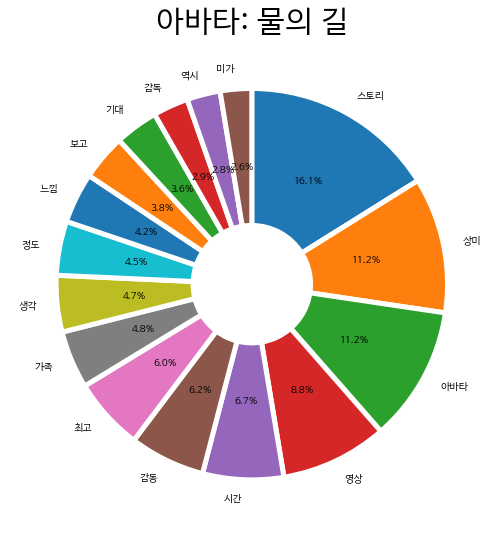

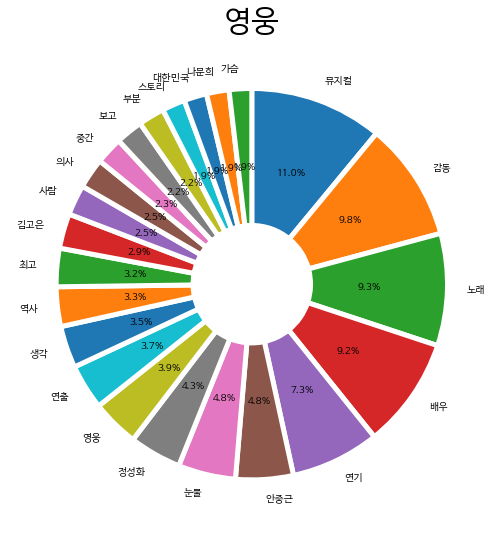

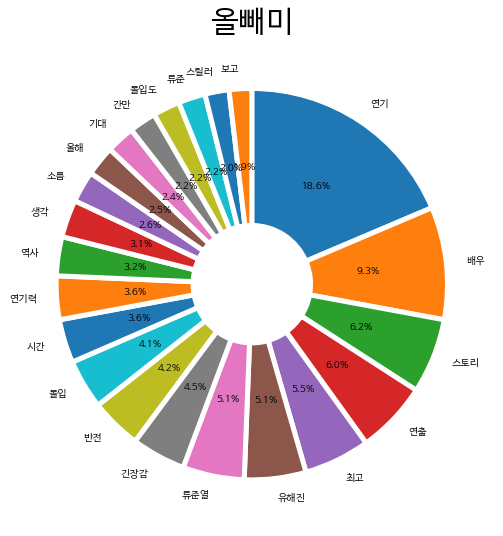

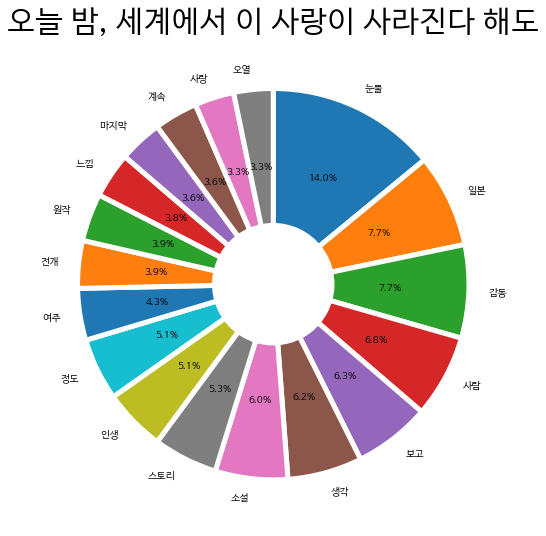

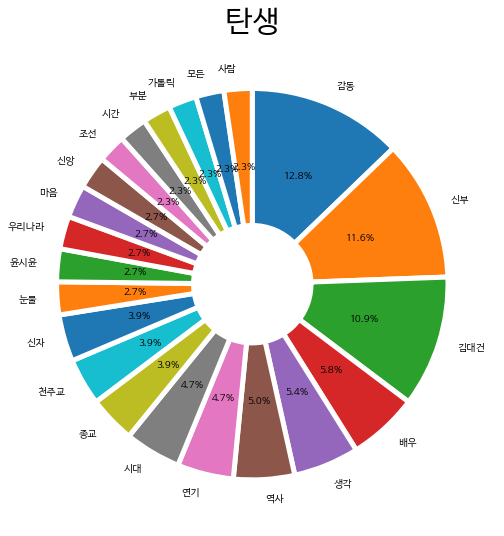

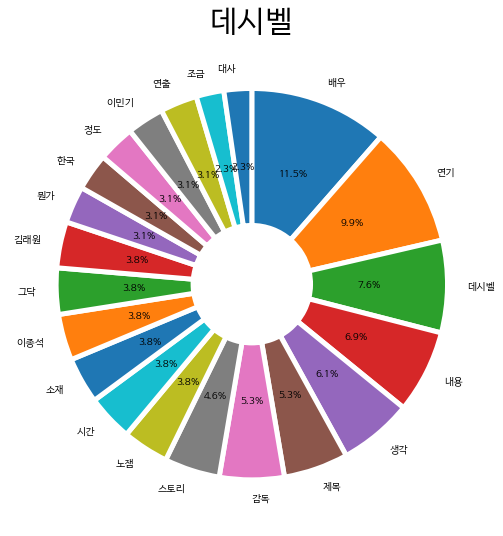

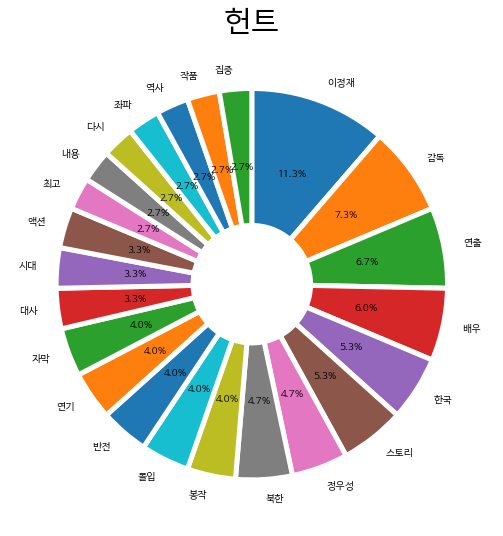

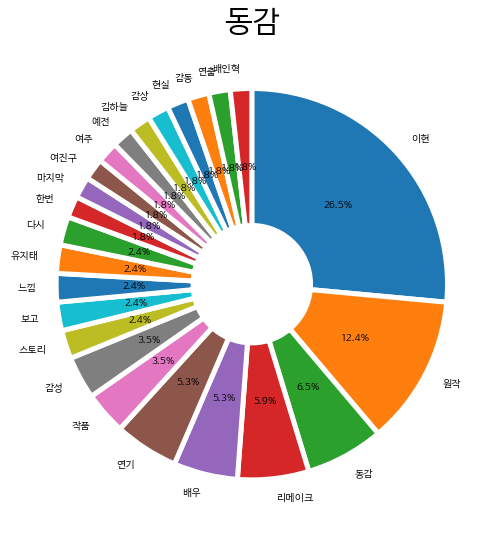

In [23]:
nlp = Okt()

for i in range(len(top_movie_titles)):
    nouns = nlp.nouns(report_concat[i])

    count = Counter(nouns)

    del count['영화']
    del count['진짜']
    del count['정말']
    del count['장면']
    del count['하나']
    del count['그냥']
    del count['아주']

    word_count = dict()

    for tag, counts in count.most_common(30):
        if(len(str(tag))>1):
            word_count[tag] = counts

    plt.figure(figsize = (16,9))

    plt.pie(word_count.values(), labels = word_count.keys(), autopct='%.1f%%', startangle=90, counterclock=False,
            wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})

    plt.title(top_movie_titles[i], fontsize = 30)

    plt.show()

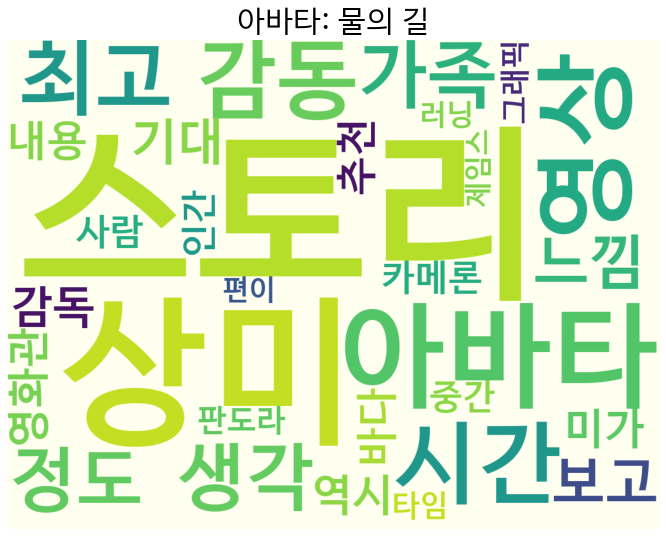

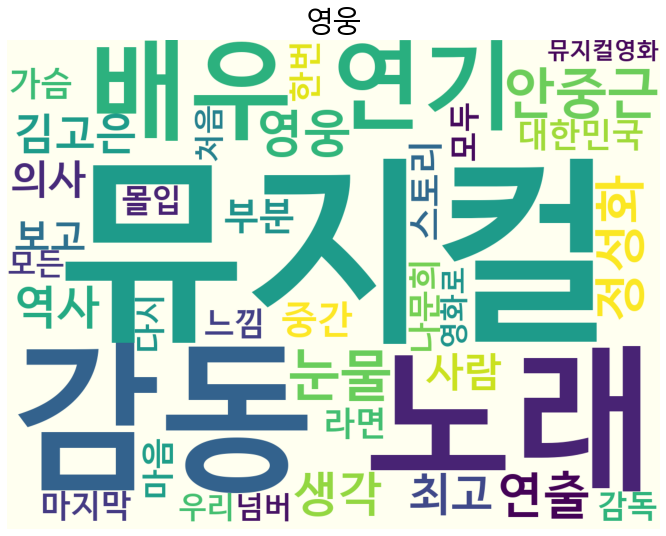

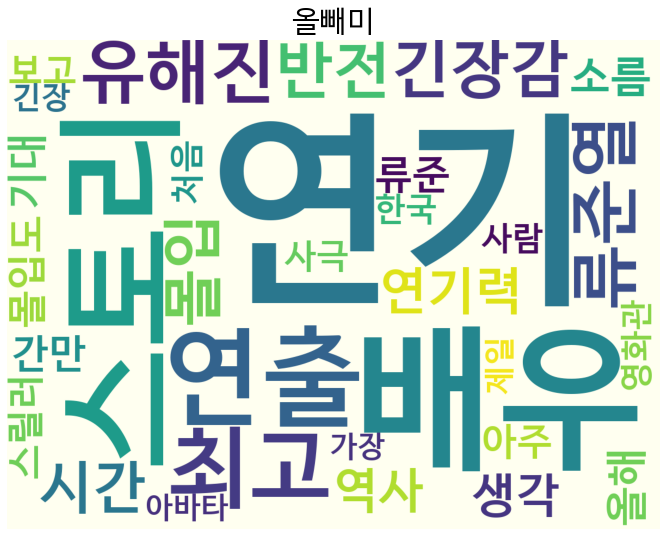

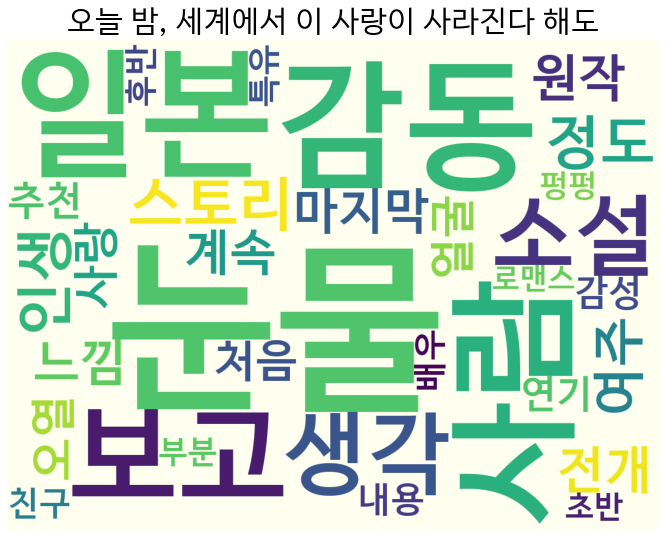

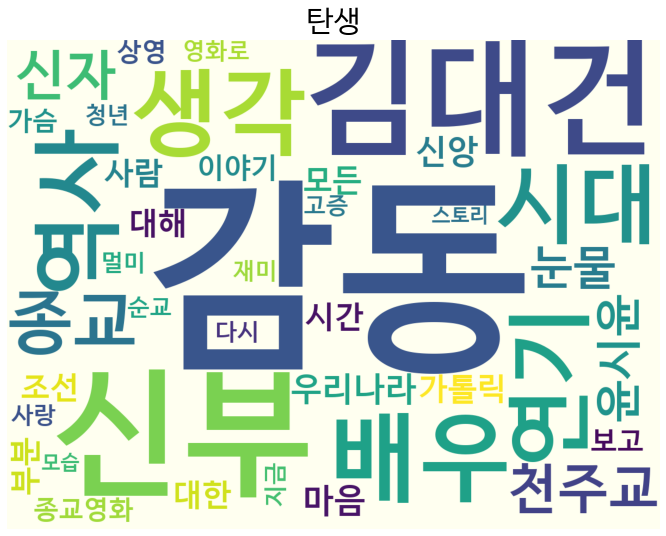

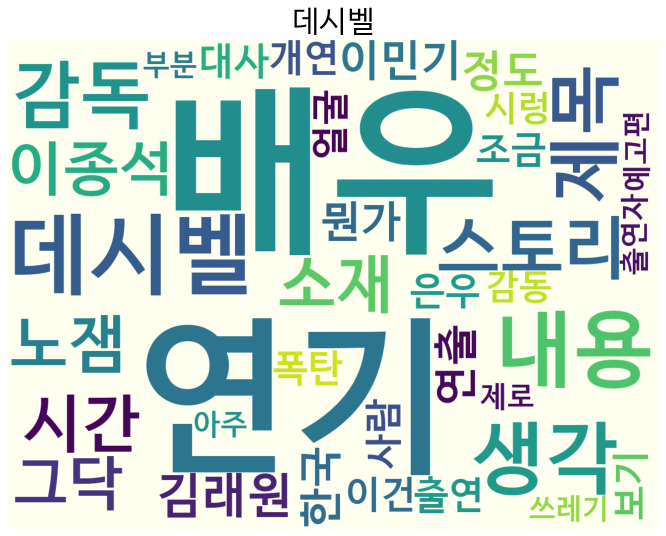

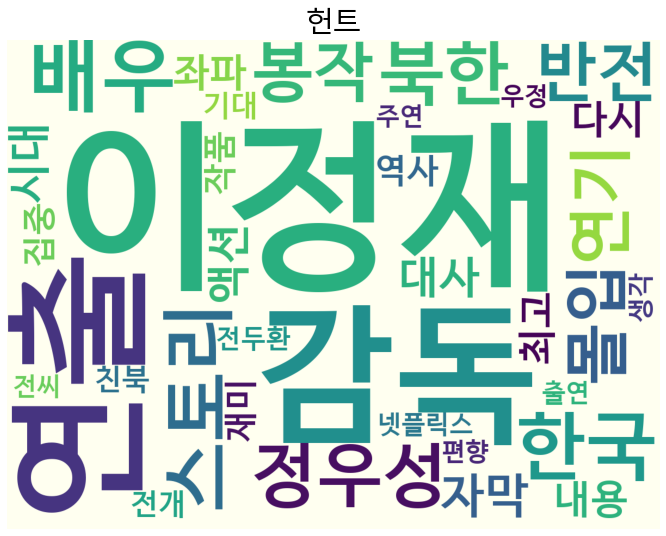

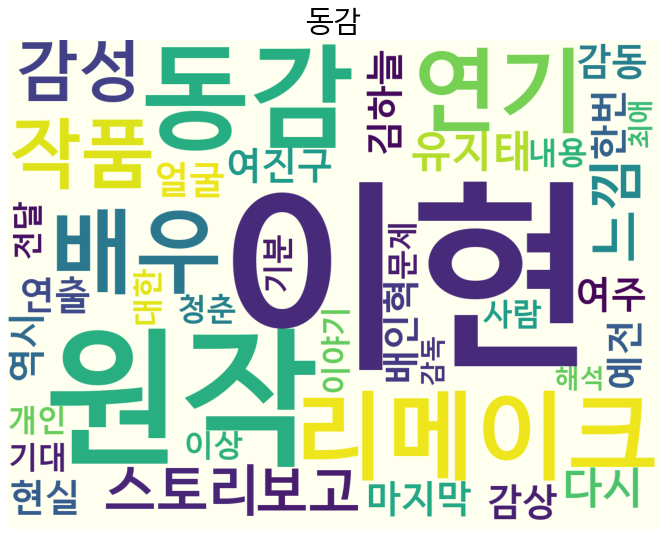

In [24]:
for i in range(len(top_movie_titles)):
    nouns = nlp.nouns(report_concat[i])

    count = Counter(nouns)
    
    word_count = dict()
    
    del count['영화']
    del count['진짜']
    del count['정말']
    del count['장면']
    del count['하나']
    del count['그냥']
    

    for tag, counts in count.most_common(50):
        if(len(str(tag))>1):
            word_count[tag] = counts



    wc = WordCloud(font_path, background_color='ivory', width=1200, height=900)

    cloud = wc.generate_from_frequencies(word_count)

    plt.figure(figsize=(24,9))
    plt.imshow(cloud)
    plt.title(top_movie_titles[i], fontsize = 30)
    plt.axis('off')
    plt.show()